In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cartopy

In [ ]:
pip install geopandas matplotlib

In [ ]:
pip install pandas plotly

In [ ]:
import folium
import pandas as pd
import plotly.express as px

import geopandas as gpd
import requests
from shapely.geometry import LineString
import matplotlib.pyplot as plt

# Importación de Datos

Queremos obtener información sobre las coordenadas de los bordes de las placas tectónicas (bordes tectónicos).

In [ ]:
# Ruta de la carpeta actual en Google Drive
path = '/content/drive/My Drive/Master ciencia de datos (Big Data & TFM)/TFM - tormentas solares/bases de datos - nuevo'

# Ruta al archivo CSV en Google Drive
file_path = path + '/dataframes_preprocesados/placas_tectonicas.xlsx'

Obtenemos los datos en formato .json desde GitHub y los tratamos para convertirlos en un dataframe. Visualizaremos el resultado para comprobar la validez de los datos.

In [ ]:
# Descargar datos de límites de placas tectónicas simplificado (GeoJSON)
url_placas_tectonicas = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json"

# Obtener datos GeoJSON
response = requests.get(url_placas_tectonicas)
data = response.json()

# Inicializar listas para almacenar datos
longitudes = []
latitudes = []
placas = []

# Iterar sobre las características (features) del GeoJSON
for feature in data['features']:
    # Obtener la geometría (línea) de la característica
    geometry = feature['geometry']

    # Extraer las coordenadas de la línea
    coordinates = geometry['coordinates']

    # Dividir las coordenadas en longitudes y latitudes
    lon, lat = zip(*coordinates)

    # Obtener información de la placa tectónica
    properties = feature['properties']
    placa = properties['Name']

    # Agregar datos a las listas
    longitudes.extend(lon)
    latitudes.extend(lat)
    placas.extend([placa] * len(lon))

# Crear un DataFrame con los datos
df = pd.DataFrame({'Placa': placas, 'Longitud': longitudes, 'Latitud': latitudes})

# Mostrar las primeras filas del DataFrame
df.head()

,Placa,Longitud,Latitud
0,AF-AN,-0.437900,-54.8518
1,AF-AN,-0.038826,-54.6772
2,AF-AN,0.443182,-54.4512
3,AF-AN,0.964534,-54.8322
4,AF-AN,1.694810,-54.3990


# Graficamos las coordenadas de los bordes tectónicos

In [ ]:
# Crear el gráfico de dispersión
fig = px.scatter_geo(df,
                     lat='Latitud',
                     lon='Longitud',
                     color='Placa',
                     projection='natural earth',
                     title='Ubicación de Placas Tectónicas en el Mundo')

fig.show()

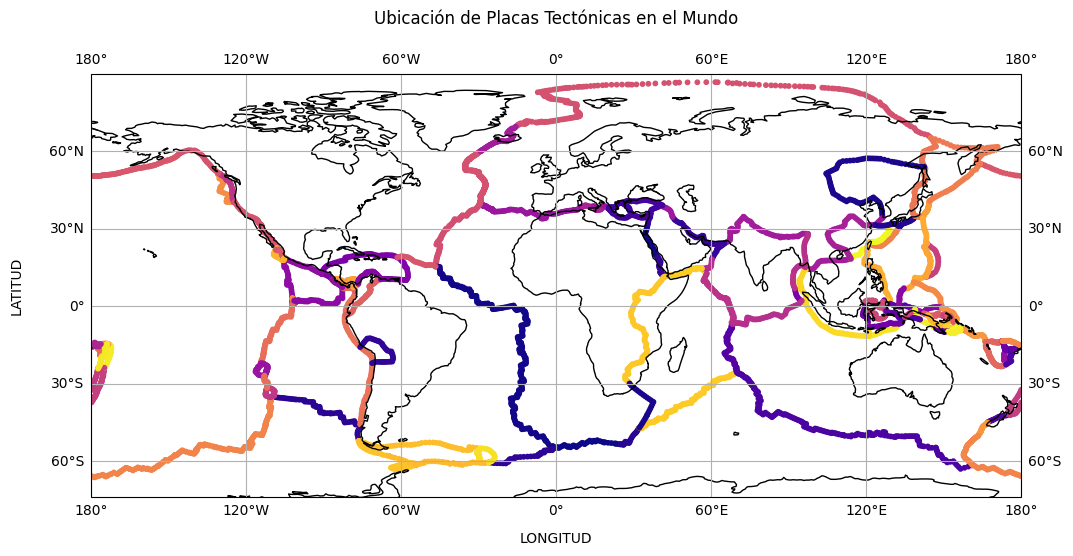

In [ ]:
import cartopy.crs as ccrs

# Crear un gráfico de dispersión con fondo de mapa mundi en Matplotlib
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
scatter = ax.scatter(df['Longitud'], df['Latitud'], c=df['Placa'].astype('category').cat.codes, cmap='plasma', s=10)

# Configuraciones adicionales
ax.set_title('Ubicación de Placas Tectónicas en el Mundo\n')
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

ax.text(0.5, -0.08, '\nLONGITUD', ha='center', va='center', transform=ax.transAxes)
ax.text(-0.08, 0.5, 'LATITUD', ha='center', va='center', transform=ax.transAxes, rotation='vertical')


# Guardar la figura como PNG
fig.savefig(path + '/imagenes/mapa_tectonico.png', bbox_inches='tight', pad_inches=0.1)

# Mostrar el gráfico
plt.show()

# Guardamos el dataframe

In [ ]:
# Guardar el DataFrame como un archivo Excel
df.to_excel(file_path, index=False)